<a href="https://colab.research.google.com/github/dralvima/IITmethods/blob/main/NeuroPALIIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Download the Data

from:
https://zenodo.org/records/3906530

[paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10494711/]

***DETAILS:***

This dataset contains 7 heads of otIs669;otIs672 (OH15500 -- singled 23x to drive isogenicity) animals. OH16230 animals are healthier than OH15500.

Animals were paralyzed using 1 mM tetramisole hydrochloride in M9 buffer to minimize motion, then placed in a microfluidic chip for stimulus delivery.

We **recorded each animal for four minutes, delivering a different stimulus at the end of each minute**, then discarded the animal.

**Three stimuli were delivered in randomized order** to the animals,

a repulsive concentration of salt and

two attractive odors: NaCl, 10^-4 2-butanone, and 10-4 2,3-pentanedione.

We used DI water as a control for the OH15500 experiments. OH15500 animals received **10s of the odors and 20s of 200 mM NaCl**, all in DI water.

    All neurons, in both datasets, were identified by Eviatar Yemini in the Hobert Lab (Columbia University).
    All whole-brain activity experiments were performed by Albert Lin in the Samuel Lab (Harvard University).
    Whole-brain activity analysis was a multi-lab effort with considerable contributions from all authors (see below).


***File contents:***

We recorded 7 heads of OH15500 animals. OH16230 is healthier than OH15500.  

We could not verify an NaCl response in one OH15500 animal and a 2,3-pentanedione response in another. As such, we chose not to represent the unverified stimulus responses in our published statistics. Nonetheless, the data is available here and we leave the choice of its representation up to the user.

To facilitate comparison, **we downsampled recordings to the lowest frame rate observed within their group: 4.1 Hz for OH15500 heads.**

We offer standard ΔF/F0 traces as well as *histogram-normalized traces, that normalize ΔF/F0*, in order to improve neuronal comparisons. We suggest using the histogram-normalized traces instead of the standard traces. For details on histogram normalization, please see the deformable non-negative matrix factorization (dNMF) publication, "Extracting neural signals from semi-immobilized animals with deformable non-negative matrix factorization", cited in the NeuroPAL publication.

**File contents:**

(a) files = whole-brain activity filenames for each animal

(b) fps = frames/second for the neuronal activity traces (all traces have been downsampled to the same fps, the minimal frame rate among the animals)

(c) stim_names = the stimulus names, use the indices in stims (e) to get the correct stimulus order

(d) stim_times = (start,end) time for stimuli, each row is a stimulus, use the indices in stims (e) to get the correct stimulus order

(e) stims = the order in which the stimuli were delivered, per file (a), as (file, stimulus order), use these indices with both stim_names (c) & stim_times (d)

(f) is_AWCL_OFF = for each file (a), was AWCL stochastically assigned to be AWC-OFF? (otherwise, AWCR is OFF)

(g) neurons = neuron names, left and right (L/R) neurons are combined into a single entry and both their traces (i or j) and positions (n) can be split using is_L (n)

(h) samples = samples (statistical N) per neuron (g)

(i) traces = the neuronal traces as (neurons, each file's neuronal trace), use (0:(length(traces{neuron}{file})-1))/fps to get the corresponding time in seconds, left and right (L/R) neuron traces are in the same row and can be split using is_L (n), left and right neurons are ordered by file (a)

(j) norm_traces = the histogram-normalized neuronal traces (i) linearly scaled and offset so that neurons are comparable (see the dNMF publication for details), we recommend using this instead of the standard traces (i)

(k) max_traces = the maximum ΔF/F0 of each trace (i)

(l) max_norm_traces = the maximum ΔF/F0 of each histogram-normalized trace (j)

(m) positions = the neuronal positions, per time, as (neurons, each file's positions for this neuron), where positions are in microns as (x,y,z), use (0:(length(traces{neuron}{file})-1))/fps to get the corresponding time in seconds, left and right (L/R) neuron positions are in the same row and can be split using is_L (n), left and right neurons are ordered by file (a)

(n) is_L = for each left-right (L/R) neuron, per trace, is it a left-sided neuron? organized as (neurons, is it left-sided?), all left-sided neuron traces are always arranged before all right-sided neurons and both are ordered by file (a), single neurons that aren't L/R have all NaN values

We judged OH15500 animal 3 (23_head_run201) as unresponsive to NaCl and animal 7 (66_head_run101) as unresponsive to 2,3-pentanedione.


**Fetch Data from Zenodo and Unzip**

In [26]:
import os
import zipfile
import urllib.request

# URL of the .zip file
url = 'https://zenodo.org/records/3906530/files/NeuroPAL%20data.zip'
zip_path = '/content/NeuroPAL_data.zip'
extract_dir = '/content/NeuroPAL_data'

# Download the .zip file
urllib.request.urlretrieve(url, zip_path)

# Create a directory to extract the contents
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Delete the original .zip file to save space
os.remove(zip_path)

**Plot a sample time series to make sure everything is correct**

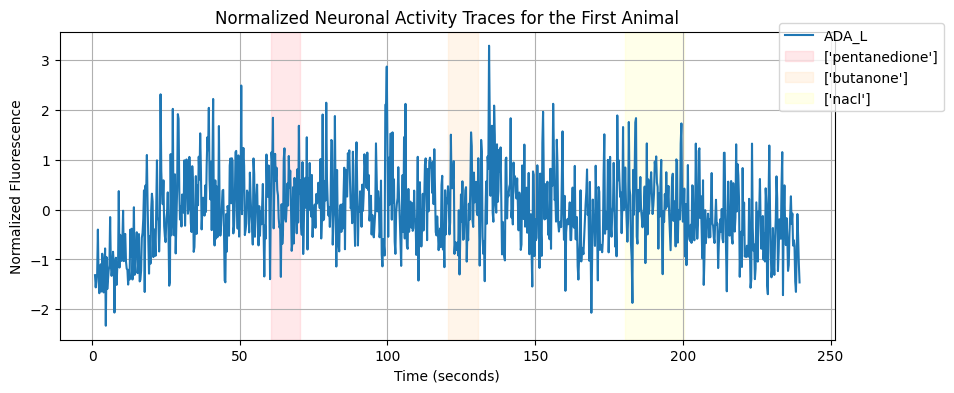

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# Load the .mat file
file_path = '/content/NeuroPAL_data/Whole-Brain Calcium Activity/Young Adults/Head_Activity_OH15500.mat'
mat_data = scipy.io.loadmat(file_path)

# Extract necessary data
fps = mat_data['fps'][0][0]
norm_traces = mat_data['norm_traces']
neuron_names = [neuron[0][0] for neuron in mat_data['neurons']]
is_L = mat_data['is_L']
stim_times = mat_data['stim_times']
stims = mat_data['stims']
stim_names = [stim_name[0] for stim_name in mat_data['stim_names']]

# Define pastel colors for different stimuli
pastel_colors = ["#FFB3BA", "#FFDFBA", "#FFFFBA", "#BAFFC9", "#BAE1FF"]

# Function to safely extract value from MATLAB cell array
def extract_value(cell_array, neuron_index, file_index):
    value = cell_array[neuron_index][file_index][0][0]
    return value

# Plot the normalized traces for the first neuron of the first animal
neuron_index = 0
file_index = 0

trace_data = norm_traces[neuron_index][0][file_index][0]

if len(trace_data) > 0:
    trace_first_animal = trace_data.flatten()
    time_points = len(trace_first_animal)
    time = np.arange(time_points) / fps

    # Determine if the neuron is on the left side
    is_left = extract_value(is_L, neuron_index, file_index) == 1

    # Plot the trace for this neuron
    plt.figure(figsize=(10, 4))
    plt.plot(time, trace_first_animal, label=f'{neuron_names[neuron_index]}{"_L" if is_left else "_R"}')

    # Add stimulus annotations with different pastel colors
    for stim_idx in range(len(stim_times)):
        start = stim_times[stim_idx, 0]
        end = stim_times[stim_idx, 1]
        stim_index = int(stims[file_index][stim_idx]) - 1  # Adjusted indexing
        color = pastel_colors[stim_idx % len(pastel_colors)]  # Cycle through colors
        plt.axvspan(start, end, color=color, alpha=0.3, label=stim_names[stim_index])

    plt.xlabel('Time (seconds)')
    plt.ylabel('Normalized Fluorescence')
    plt.title('Normalized Neuronal Activity Traces for the First Animal')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.05))
    plt.grid(True)
    plt.show()

Search for and plot IIT2.0 'CORE' neurons

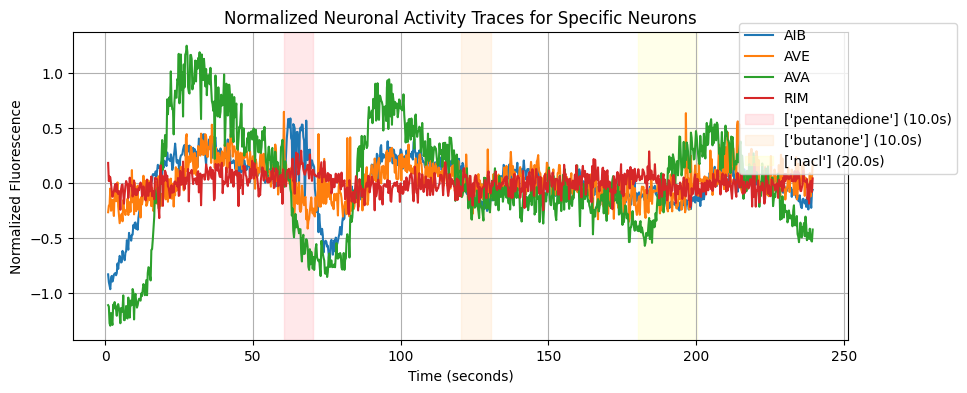

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# Load the .mat file
file_path = '/content/NeuroPAL_data/Whole-Brain Calcium Activity/Young Adults/Head_Activity_OH15500.mat'
mat_data = scipy.io.loadmat(file_path)

# Extract necessary data
fps = mat_data['fps'][0][0]
norm_traces = mat_data['norm_traces']
neuron_names = [neuron[0][0] for neuron in mat_data['neurons']]
is_L = mat_data['is_L']
stim_times = mat_data['stim_times']
stims = mat_data['stims']
stim_names = [stim_name[0] for stim_name in mat_data['stim_names']]

# Define pastel colors for different stimuli
pastel_colors = ["#FFB3BA", "#FFDFBA", "#FFFFBA", "#BAFFC9", "#BAE1FF"]

# Function to safely extract value from MATLAB cell array
def extract_value(cell_array, neuron_index, file_index):
    value = cell_array[neuron_index][file_index][0][0]
    return value

# Check for the specific neurons AIB, AVE, AVA, RIM
specific_neurons = ['AIB', 'AVE', 'AVA', 'RIM']
available_neurons = [neuron for neuron in specific_neurons if neuron in neuron_names]

# Plot the normalized traces for the available specific neurons of the first animal
file_index = 0

plt.figure(figsize=(10, 4))

for neuron_name in available_neurons:
    neuron_index = neuron_names.index(neuron_name)
    trace_data = norm_traces[neuron_index][0][file_index][0]
    if len(trace_data) > 0:
        trace_first_animal = trace_data.flatten()
        time_points = len(trace_first_animal)
        time = np.arange(time_points) / fps

        # Plot the trace for this neuron
        plt.plot(time, trace_first_animal, label=neuron_name)

# Add stimulus annotations with different pastel colors and display durations
for stim_idx in range(len(stim_times)):
    start = stim_times[stim_idx, 0]
    end = stim_times[stim_idx, 1]
    duration = end - start
    stim_index = int(stims[file_index][stim_idx]) - 1  # Adjusted indexing
    color = pastel_colors[stim_idx % len(pastel_colors)]  # Cycle through colors
    plt.axvspan(start, end, color=color, alpha=0.3, label=f'{stim_names[stim_index]} ({duration}s)')

plt.xlabel('Time (seconds)')
plt.ylabel('Normalized Fluorescence')
plt.title('Normalized Neuronal Activity Traces for Specific Neurons')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.05))
plt.grid(True)
plt.show()

# 2. Binarize Time Series

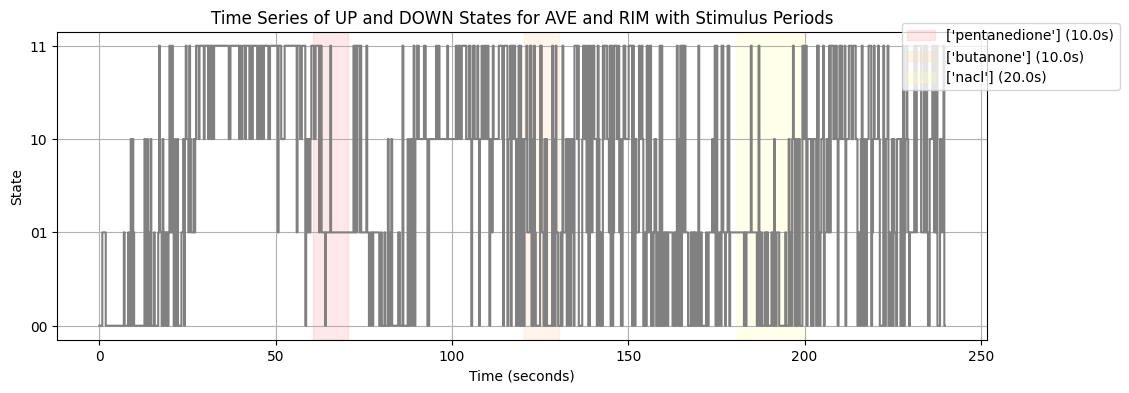

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# Load the .mat file
file_path = '/content/NeuroPAL_data/Whole-Brain Calcium Activity/Young Adults/Head_Activity_OH15500.mat'
mat_data = scipy.io.loadmat(file_path)

# Extract necessary data
fps = mat_data['fps'][0][0]
norm_traces = mat_data['norm_traces']
neuron_names = [neuron[0][0] for neuron in mat_data['neurons']]
is_L = mat_data['is_L']
stim_times = mat_data['stim_times']
stims = mat_data['stims']
stim_names = [stim_name[0] for stim_name in mat_data['stim_names']]

# Define pastel colors for different stimuli
pastel_colors = ["#FFB3BA", "#FFDFBA", "#FFFFBA", "#BAFFC9", "#BAE1FF"]

# Function to safely extract value from MATLAB cell array
def extract_value(cell_array, neuron_index, file_index):
    value = cell_array[neuron_index][file_index][0][0]
    return value

# Neurons of interest
neurons_of_interest = ['AVE', 'RIM']

# Extract and binarize the time series for the neurons of interest
binarized_series = {}
file_index = 0

for neuron_name in neurons_of_interest:
    if neuron_name in neuron_names:
        neuron_index = neuron_names.index(neuron_name)
        trace_data = norm_traces[neuron_index][0][file_index][0]
        if len(trace_data) > 0:
            trace_first_animal = trace_data.flatten()
            trace_first_animal = np.nan_to_num(trace_first_animal)  # Replace NaNs with zeros
            median_value = np.nanmedian(trace_first_animal)  # Ignore NaNs when calculating median
            binarized_series[neuron_name] = np.where(trace_first_animal >= median_value, 1, 0)

# Combine the binarized time series into a 2-bit time series
if 'AVE' in binarized_series and 'RIM' in binarized_series:
    time_points = len(binarized_series[neurons_of_interest[0]])
    combined_series = binarized_series['AVE'] * 2 + binarized_series['RIM']
    time = np.arange(time_points) / fps

    # Plot the 2-bit time series
    plt.figure(figsize=(12, 4))

    # Add stimulus annotations with different pastel colors and display durations
    for stim_idx in range(len(stim_times)):
        start = stim_times[stim_idx, 0]
        end = stim_times[stim_idx, 1]
        duration = end - start
        stim_index = int(stims[file_index][stim_idx]) - 1  # Adjusted indexing
        color = pastel_colors[stim_idx % len(pastel_colors)]  # Cycle through colors
        plt.axvspan(start, end, color=color, alpha=0.3, label=f'{stim_names[stim_index]} ({duration}s)')

    plt.step(time, combined_series, where='mid', color='gray')
    plt.yticks([0, 1, 2, 3], ['00', '01', '10', '11'])
    plt.xlabel('Time (seconds)')
    plt.ylabel('State')
    plt.title('Time Series of UP and DOWN States for AVE and RIM with Stimulus Periods')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.05))
    plt.grid(True)
    plt.show()
else:
    print("Not all required neurons are available in the dataset.")


**Extract Stimulus-Period**

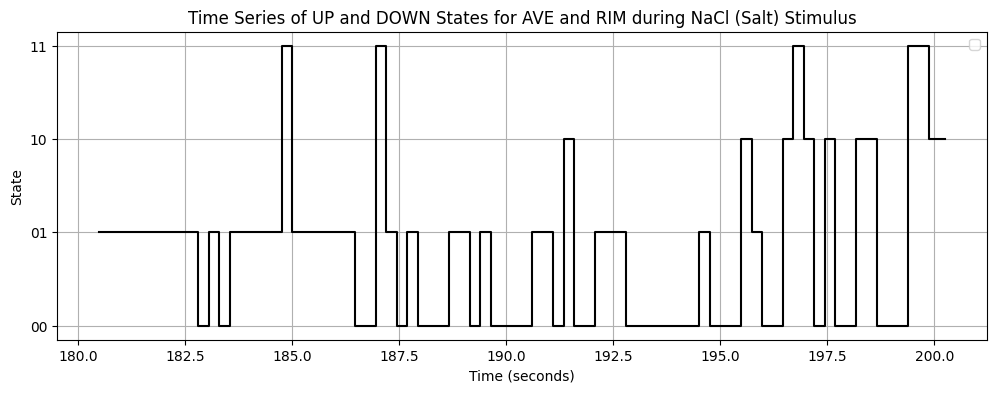

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# Load the .mat file
file_path = '/content/NeuroPAL_data/Whole-Brain Calcium Activity/Young Adults/Head_Activity_OH15500.mat'
mat_data = scipy.io.loadmat(file_path)

# Extract necessary data
fps = mat_data['fps'][0][0]
norm_traces = mat_data['norm_traces']
neuron_names = [neuron[0][0] for neuron in mat_data['neurons']]
is_L = mat_data['is_L']
stim_times = mat_data['stim_times']
stims = mat_data['stims']
stim_names = [stim_name[0] for stim_name in mat_data['stim_names']]

# Define pastel colors for different stimuli
pastel_colors = ["#FFB3BA", "#FFDFBA", "#FFFFBA", "#BAFFC9", "#BAE1FF"]

# Function to safely extract value from MATLAB cell array
def extract_value(cell_array, neuron_index, file_index):
    value = cell_array[neuron_index][file_index][0][0]
    return value

# Neurons of interest
neurons_of_interest = ['AVE', 'RIM']

# Extract and binarize the time series for the neurons of interest
binarized_series = {}
file_index = 0

for neuron_name in neurons_of_interest:
    if neuron_name in neuron_names:
        neuron_index = neuron_names.index(neuron_name)
        trace_data = norm_traces[neuron_index][0][file_index][0]
        if len(trace_data) > 0:
            trace_first_animal = trace_data.flatten()
            trace_first_animal = np.nan_to_num(trace_first_animal)  # Replace NaNs with zeros
            median_value = np.nanmedian(trace_first_animal)  # Ignore NaNs when calculating median
            binarized_series[neuron_name] = np.where(trace_first_animal >= median_value, 1, 0)

# Combine the binarized time series into a 2-bit time series
if 'AVE' in binarized_series and 'RIM' in binarized_series:
    time_points = len(binarized_series[neurons_of_interest[0]])
    combined_series = binarized_series['AVE'] * 2 + binarized_series['RIM']
    time = np.arange(time_points) / fps

    # Filter time points for NaCa (salt) stimulus
    na_ca_indices = []
    for stim_idx in range(len(stim_times)):
        start = int(stim_times[stim_idx, 0] * fps)
        end = int(stim_times[stim_idx, 1] * fps)
        stim_index = int(stims[file_index][stim_idx]) - 1
        if stim_names[stim_index] == 'nacl':
            na_ca_indices.extend(range(start, end))

    # Extract the filtered time points and corresponding combined series
    filtered_time = time[na_ca_indices]
    filtered_combined_series = combined_series[na_ca_indices]

    # Plot the filtered 2-bit time series
    plt.figure(figsize=(12, 4))
    plt.step(filtered_time, filtered_combined_series, where='mid', color='black')
    plt.yticks([0, 1, 2, 3], ['00', '01', '10', '11'])
    plt.xlabel('Time (seconds)')
    plt.ylabel('State')
    plt.title('Time Series of UP and DOWN States for AVE and RIM during NaCl (Salt) Stimulus')
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print("Not all required neurons are available in the dataset.")

# 3. Compute TPM

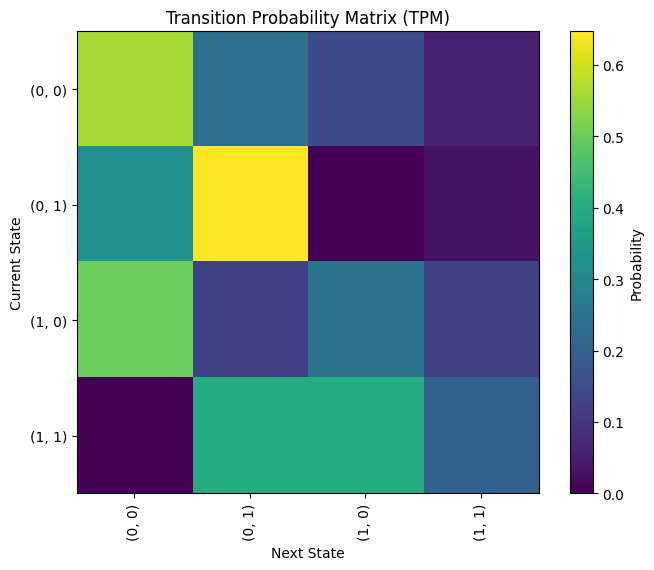

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from itertools import product

# Load the .mat file
file_path = '/content/NeuroPAL_data/Whole-Brain Calcium Activity/Young Adults/Head_Activity_OH15500.mat'
mat_data = scipy.io.loadmat(file_path)

# Extract necessary data
fps = mat_data['fps'][0][0]
norm_traces = mat_data['norm_traces']
neuron_names = [neuron[0][0] for neuron in mat_data['neurons']]
is_L = mat_data['is_L']
stim_times = mat_data['stim_times']
stims = mat_data['stims']
stim_names = [stim_name[0] for stim_name in mat_data['stim_names']]

# Function to safely extract value from MATLAB cell array
def extract_value(cell_array, neuron_index, file_index):
    value = cell_array[neuron_index][file_index][0][0]
    return value

# Neurons of interest
neurons_of_interest = ['AVE', 'RIM']

# Extract and binarize the time series for the neurons of interest
binarized_series = {}
file_index = 0

for neuron_name in neurons_of_interest:
    if neuron_name in neuron_names:
        neuron_index = neuron_names.index(neuron_name)
        trace_data = norm_traces[neuron_index][0][file_index][0]
        if len(trace_data) > 0:
            trace_first_animal = trace_data.flatten()
            trace_first_animal = np.nan_to_num(trace_first_animal)  # Replace NaNs with zeros
            median_value = np.nanmedian(trace_first_animal)  # Ignore NaNs when calculating median
            binarized_series[neuron_name] = np.where(trace_first_animal >= median_value, 1, 0)

# Combine the binarized time series into a 2-bit time series
if 'AVE' in binarized_series and 'RIM' in binarized_series:
    time_points = len(binarized_series[neurons_of_interest[0]])
    combined_series = binarized_series['AVE'] * 2 + binarized_series['RIM']
    time = np.arange(time_points) / fps

    # Filter time points for NaCl (salt) stimulus
    na_ca_indices = []
    for stim_idx in range(len(stim_times)):
        start = int(stim_times[stim_idx, 0] * fps)
        end = int(stim_times[stim_idx, 1] * fps)
        stim_index = int(stims[file_index][stim_idx]) - 1
        if stim_names[stim_index] == 'nacl':
            na_ca_indices.extend(range(start, end))

    # Compute TPM
    num_neurons = len(neurons_of_interest)
    states = list(product([0, 1], repeat=num_neurons))
    state_indices = {state: i for i, state in enumerate(states)}

    tpm = np.zeros((len(states), len(states)))

    for i in range(len(na_ca_indices) - 1):
        current_state = (binarized_series['AVE'][na_ca_indices[i]], binarized_series['RIM'][na_ca_indices[i]])
        next_state = (binarized_series['AVE'][na_ca_indices[i+1]], binarized_series['RIM'][na_ca_indices[i+1]])
        current_index = state_indices[current_state]
        next_index = state_indices[next_state]
        tpm[current_index, next_index] += 1

    # Normalize TPM
    tpm = tpm / tpm.sum(axis=1, keepdims=True)

    # Plot the TPM
    plt.figure(figsize=(8, 6))
    plt.imshow(tpm, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Probability')
    plt.xticks(ticks=np.arange(len(states)), labels=[str(state) for state in states], rotation=90)
    plt.yticks(ticks=np.arange(len(states)), labels=[str(state) for state in states])
    plt.xlabel('Next State')
    plt.ylabel('Current State')
    plt.title('Transition Probability Matrix (TPM)')
    plt.show()
else:
    print("Not all required neurons are available in the dataset.")

# 4. Run PyPhi (IIT 4.0)

In [52]:
!pip install -U git+https://github.com/wmayner/pyphi.git@feature/iit-4.0
import itertools
import pyphi
# Disable PyPhi progress bars and welcome message
pyphi.config.PROGRESS_BARS = False
pyphi.config.WELCOME_OFF = True

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import time


# Check if a result file already exists to save time
if not os.path.exists('worm_phi_results.pkl'):

  # Record the start time
  start_time = time.time()

  # Setting up the required parameters for pyPhi analysis
  labels = ('A', 'B')
  num_bits = len(labels)
  possible_states = np.array(list(itertools.product([0, 1], repeat=num_bits)))

  # Function to calculate phi values and states for a single TPM, tracking skipped trials
  def calculate_phi_for_tpm(tpm, possible_states, labels):
      converted_tpm = pyphi.convert.sbs2sbn(tpm)
      network = pyphi.Network(converted_tpm, node_labels=labels)
      node_indices = (0, 1)

      phi_values = np.zeros(len(possible_states))
      phi_states = np.zeros((len(possible_states), 2), dtype=int)

      max_phi = -np.inf
      max_phi_state = None
      phi_mechanisms = []

      for i, state in enumerate(possible_states):
            candidate_system = pyphi.Subsystem(network, state, node_indices)
            phi_structure = pyphi.new_big_phi.phi_structure(candidate_system)
            big_phi = phi_structure.big_phi
            phi_values[i] = big_phi
            phi_states[i] = state
            current_state_mechanisms = [distinction.mechanism for distinction in phi_structure.distinctions]
            phi_mechanisms.append(current_state_mechanisms)
            if big_phi > max_phi:
                max_phi = big_phi
                max_phi_state = state

      return phi_values, phi_states, max_phi, max_phi_state, phi_mechanisms, converted_tpm

  # Calculate phi values
  phi_results = calculate_phi_for_tpm(tpm, possible_states, labels)
  phi_values = phi_results[0]
  phi_states = phi_results[1]
  max_phi = phi_results[2]
  max_phi_state = phi_results[3]
  phi_mechanisms = phi_results[4]
  converted_tpm = phi_results[5]

  # Saving the results and the list of skipped trials
  with open('worm_phi_results.pkl', 'wb') as file:
    pickle.dump(phi_results, file)

  # Record the end time and calculate duration
  end_time = time.time()
  elapsed_time = end_time - start_time
  # Convert elapsed time into hours, minutes, and seconds
  hours = int(elapsed_time // 3600)
  minutes = int((elapsed_time % 3600) // 60)
  seconds = elapsed_time % 60

  elapsed_time_formatted = f"{hours} hours, {minutes} minutes, {seconds:.2f} seconds"

  print(f"Elapsed time for PHI computation: {elapsed_time_formatted}")

else:
    print("File 'worm_phi_results.pkl' already exists. Skipping computation.")

  Cloning https://github.com/wmayner/pyphi.git (to revision feature/iit-4.0) to /tmp/pip-req-build-m8x641h9
  Running command git clone --filter=blob:none --quiet https://github.com/wmayner/pyphi.git /tmp/pip-req-build-m8x641h9
  Resolved https://github.com/wmayner/pyphi.git to commit 22498f368381782d24c0e46f0717bd78900b24a3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyphi: filename=pyphi-2.0.0a1-py3-none-any.whl size=707861 sha256=ca7126205398516b9759508496b3b64c4d33d392de4f3be9c8440e112feb8a6c
  Stored in directory: /tmp/pip-ephem-wheel-cache-zmclu40b/wheels/53/0c/22/b822eefec0e167f711096ad1eeecd6964cb6030a41bda0e07e
  Created wheel for Graphillion: filename=Graphillion-1.8-cp310-cp310-linux_x86_64.whl size=6957516 sha256=af66091dfde8b5230d1d8f1026cd42879b7

# 4. Plot the CES (PHI structure)

In [54]:
substrate = pyphi.Network(converted_tpm, node_labels=labels)
# Pick the Max Phi state (YOU CAN MANUALLY CHANGE THIS TO LOOK AT ANY POSSIBLE STATE YOU LIKE)
substrate_state = (max_phi_state)
# units are python indexed, 0 is node A, 1 is node B, 2 is node C
candidate_complex_units = (0,1)
candidate_cause_complex = pyphi.Subsystem(substrate, substrate_state, nodes=candidate_complex_units)
candidate_effect_complex = pyphi.Subsystem(substrate, substrate_state, nodes=candidate_complex_units)
phi_structure = pyphi.new_big_phi.phi_structure(candidate_effect_complex)

In [56]:
from pyphi import visualize
import matplotlib.pyplot as plt
# must click run button twice to visualize
fig = visualize.phi_structure.plot_phi_structure(phi_structure=phi_structure,subsystem=candidate_effect_complex)
fig.show()